Import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

<ipython-input-1-765c5837f8f9>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


Now read the dataset in to the colab file

In [ ]:
df =pd.read_excel('/content/Life_Expectancy_Data.xlsx')

Now run the loaded dataset

In [ ]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Now check the first five columns and rows of the dataset by using head

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Conclusion:
It shows you the initial rows of your dataset, allowing you to get a quick glance at the data to understand its structure and contents

Now check the last five columns and rows of the dataset by using tail

In [ ]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


Conclusion: It shows you the final rows of your dataset, allowing you to quickly inspect the concluding part of the data.

Now we can check the shape of the dataset

In [ ]:
df.shape

(2938, 22)

Conclusion:-  It gives you a quick overview of your DataFrame's structure by providing two pieces of information: the number of rows and the number of columns.

Now check the information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Conclusion:
 it provides a comprehensive summary of your DataFrame's information.

Now check the description of the dataset.

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Conclusion: It  produces a statistical summary of numerical columns in your DataFrame, providing key indicators like the average (mean), spread (standard deviation), central position (median), and quartiles (Q1, Q2, Q3). This summary gives a concise overview of the central tendencies, variability, and overall distribution shape of your numerical data. It's a quick way to grasp the essential statistical characteristics of your dataset's numerical features.

Now check the total number of columns of the dataset.

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Now check the null values of the dataset

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Conclusion:
  It provides a clear summary of the  count of the missing values in each column of your DataFrame.

Now find the unique values of the columns which have null values.

In [ ]:
df['Life expectancy'].unique()

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.6, 75.4, 75.1,
       74.9, 74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 71.7, 71.6, 71.4,
       71.3, 52.4, 51.7, 51.1, 56. , 51. , 49.6, 49.1, 48.7, 48.2, 47.7,
       47.4, 47.1, 46.8, 46.5, 45.7, 45.3, 76.4, 75.7, 75.2, 75. , 74.8,
       74.6, 74. , 76.3, 76. , 75.5, 73.9, 73.2, 72.7, 72. , 82.8, 82.7,
       82.5, 82.3, 82. , 81.9, 81.7, 81.3, 81.2, 81. , 86. , 83. , 79.9,
       79.5, 81.5, 81.4, 81.1, 88. , 84. , 79.8, 79.4, 79.3, 78.8, 78.7,
       78.6, 78.1, 72.5, 72.2, 71.9, 71.1, 78. , 69.2, 68.4, 67.8, 67.5,
       66.6, 74.5, 73.1, 76.8, 76.7, 76.5, 75.8, 71.8, 71. , 77. , 69.9,
       69.5, 69.1, 68.6, 68.2, 67.3, 66.8, 66.3, 65.8, 65.3, 73.7, 70. ,
       69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. , 87. , 80. , 78.9, 78.3,
       77.6, 69.4, 69.6, 69. , 68.7, 68.5, 68.3, 60

Now we can fill the null values with the help of mean , median , mode , fillna , bfillna

In [ ]:
df['Life expectancy'].mean()

69.22493169398908

In [ ]:
df['Life expectancy'].mode()

0    73.0
Name: Life expectancy, dtype: float64

In [ ]:
df['Life expectancy'].median()

72.1

In [ ]:
df['Life expectancy'].fillna(df['Life expectancy'].mean(), inplace=True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Life expectancy' column, contributing to a better understanding and preprocessing of the life expectancy data.







In [ ]:
df['Adult Mortality'].unique()

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

In [ ]:
df['Adult Mortality'].mean()

164.79644808743168

In [ ]:
df['Adult Mortality'].mode()

0    12.0
Name: Adult Mortality, dtype: float64

In [ ]:
df['Adult Mortality'].median()

144.0

In [ ]:
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace =True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Adult Mortality' column, contributing to a better understanding and preprocessing of the adult mortality data.







In [ ]:
df['Alcohol'].unique()

array([0.01, 0.03, 0.02, ..., 2.44, 3.56, 4.57])

In [ ]:
df['Alcohol'].mean()

4.602860787172012

In [ ]:
df['Alcohol'].mode()

0    0.01
Name: Alcohol, dtype: float64

In [ ]:
df['Alcohol'].median()

3.755

In [ ]:
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace = True)


Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Alcohol' column, contributing to a better understanding and preprocessing of the alcohol consumption data.

In [ ]:
df['Hepatitis B'].unique()

array([65., 62., 64., 67., 68., 66., 63., 99., 98., 97., 96., 95., 94.,
       91.,  9.,  8., 83., 81., nan, 77., 75., 72., 61., 69., 73., 85.,
       84., 88., 93., 89., 78., 55., 92., 86., 44., 33., 74., 52., 49.,
        5., 51., 21., 45., 11., 87., 18., 56.,  7.,  6., 76., 82., 79.,
       15., 36., 48.,  1.,  4., 42., 28., 14., 47., 23., 46., 37., 39.,
       24., 17., 27., 25., 16.,  2., 35., 29., 26., 54., 57., 38., 59.,
       71., 43., 58., 41., 31., 12., 32., 22., 53., 19.])

In [ ]:
df['Hepatitis B'].mean()

80.94046121593291

In [ ]:
df['Hepatitis B'].mode()

0    99.0
Name: Hepatitis B, dtype: float64

In [ ]:
df['Hepatitis B'].median()

92.0

In [ ]:
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace =True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Hepatitis B' column, contributing to a better understanding and preprocessing of the Hepatitis B vaccination coverage data.

In [ ]:
df['BMI'].unique()

array([19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16.2, 15.7, 15.2, 14.7, 14.2,
       13.8, 13.4, 13. , 12.6, 12.2, 58. , 57.2, 56.5, 55.8, 55.1, 54.3,
       53.5, 52.6, 51.7,  5.8, 49.9, 48.9, 47.9, 46.9, 46. , 45. , 59.5,
       58.4, 56.1, 55. , 53.9, 52.8, 51.8, 49.8, 47. , 46.1, 45.3, 44.4,
       23.3, 22.7, 22.1, 21.5, 21. ,  2.4, 19.8, 19.3, 18.8, 18.2, 17.7,
       16.8, 16.3, 15.8, 15.4, 47.7, 46.4, 45.7, 45.1, 43.8, 43.2, 42.6,
       42. , 41.4,  4.8,  4.1, 39.5, 38.9, 38.2, 62.8, 62.2, 61.6, 61. ,
        6.4, 59.8, 59.2, 58.6, 57.5, 56.9, 56.3, 55.7, 54.6, 54. , 54.9,
       54.1, 53.3, 51.9, 51.2,  5.7,  5.1, 49.7, 49.2, 48.8, 48.4, 48.1,
       47.8, 47.4, 47.1, 66.6, 66.1, 65.5, 65. , 64.4, 63.9, 63.4, 62.9,
       62.5, 62. , 61.5,  6.9,  6.3, 59.6, 59. , 58.2, 57.6, 57.1, 56.6,
       55.2, 54.7, 54.2, 53.7, 53.2, 52.7, 52.2,  5.6, 52.5, 51.5, 48. ,
       47.3, 46.6, 45.9, 44.7, 44.2, 43.6, 43.1, 42.1, 64.5, 63.8, 63.2,
       62.6, 61.3,  6.7,  6.1, 59.4, 58.7, 58.1, 57

In [ ]:
df['BMI'].mode()

0    58.5
Name: BMI, dtype: float64

In [ ]:
df['BMI'].median()

43.5

In [ ]:
df['BMI'].mean()

38.321246556473824

In [ ]:
df['BMI'].fillna(df['BMI'].mean(), inplace =True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'BMI' column, contributing to a better understanding and preprocessing of the BMI data.

In [ ]:
df['Polio'].unique()

array([ 6., 58., 62., 67., 68., 66., 63., 64.,  5., 41., 36., 35., 24.,
       99., 98., 97., 95., 94., 92., 88., 86., 87., 89.,  7., 75., 73.,
       81., 65., 39.,  4., 37.,  3., 96., 93., 91., 85.,  9., 83., 84.,
       82., 71.,  8., 79., 78., 77., 53., 74., 76., 69., 45., 72., 54.,
       59., 61., 57., 47., 23., 46., 44., 42., 38., 52., 51., 43., 32.,
       49., 31., 26., 17., 55., 48., 56., nan, 33.])

In [ ]:
df['Polio'].mode()

0    99.0
Name: Polio, dtype: float64

In [ ]:
df['Polio'].median()

93.0

In [ ]:
df['Polio'].mean()

82.55018842069202

In [ ]:
df['Polio'].fillna(df['Polio'].mean(), inplace = True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Polio' column, contributing to a better understanding and preprocessing of the Polio vaccination coverage data.

In [ ]:
df['Total expenditure'].unique()

array([ 8.16,  8.18,  8.13,  8.52,  7.87,  9.2 ,  9.42,  8.33,  6.73,
        7.43,  8.7 ,  8.79,  8.82,  7.76,  7.8 ,  8.2 ,  6.  ,  5.88,
        5.66,  5.59,  5.71,  5.34,  5.79,  5.87,  6.1 ,  5.86,  6.12,
        6.38,  6.27,  6.3 ,  6.26,   nan,  7.21,  7.12,  6.14,  5.29,
        5.12,  5.36,  4.2 ,  3.82,  3.36,  3.24,  3.54,  3.6 ,  3.73,
        3.84,  3.49,  3.31,  4.26,  3.3 ,  3.38,  3.39,  4.37,  4.54,
        4.1 ,  4.71,  4.41,  3.63,  5.38,  2.79,  5.54,  5.33,  5.39,
        5.65,  5.63,  4.86,  4.69,  4.27,  4.34,  4.21,  4.53,  4.48,
        4.13,  4.79,  4.99,  5.2 ,  5.89,  6.55,  7.63,  6.66,  6.49,
        6.68,  6.85,  6.84,  8.22,  8.31,  9.38,  9.21,  4.55,  3.71,
        4.56,  3.8 ,  4.31,  4.58,  5.25,  5.5 ,  5.56,  5.4 ,  5.94,
        6.25,  9.36,  9.5 ,  8.78,  8.53,  8.49,  8.45,  8.57,  8.32,
        8.39,  8.8 , 11.21, 11.14, 11.17,  1.94, 11.19,  1.6 ,  1.4 ,
        1.35,  1.53,  1.56,  1.48,  1.27,  1.12,  6.4 ,  5.37,  5.1 ,
        5.85,  6.17,

In [ ]:
df['Total expenditure'].mode()

0    4.6
Name: Total expenditure, dtype: float64

In [ ]:
df['Total expenditure'].median()

5.755

In [ ]:
df['Total expenditure'].mean()

5.9381895280235995

In [ ]:
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace = True)

  Conclusion:
  In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Total expenditure' column, contributing to a better understanding and preprocessing of the total health expenditure data.

In [ ]:
df['Diphtheria'].unique()

array([65., 62., 64., 67., 68., 66., 63., 58.,  5., 41., 36., 33., 24.,
       99., 98., 97., 95., 93., 88., 86., 87., 89., 77., 75., 71.,  6.,
       69., 73., 34., 38.,  4., 28., 94., 91., 96., 83.,  9., 92., 85.,
       84., 81., 79., 78., 76., 82.,  8., 74.,  7., 72., 45., 61., 54.,
       59., 47., 23., 42., 48., 51., 44., 37., 46., 39., 19., 25., 21.,
       26., 31., 56.,  3., 53., 16.,  2., 43., 35., 32., 57., 49., 55.,
       52., nan, 29., 27.])

In [ ]:
df['Diphtheria'].mode()

0    99.0
Name: Diphtheria, dtype: float64

In [ ]:
df['Diphtheria'].median()

93.0

In [ ]:
df['Diphtheria'].mean()

82.32408359027065

In [ ]:
df['Diphtheria'].fillna(df['Diphtheria'].mean(), inplace= True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Diphtheria' column, contributing to a better understanding and preprocessing of the diphtheria vaccination coverage data.

In [ ]:
df['GDP'].unique()

array([584.25921  , 612.696514 , 631.744976 , ...,  57.34834  ,
       548.587312 , 547.3588785])

In [ ]:
df['GDP'].mean()

7483.158469138474

In [ ]:
df['GDP'].mode()

0            1.681350
1            3.685949
2            4.613575
3            5.668726
4            8.376432
            ...      
2485     89739.711700
2486    113751.850000
2487    114293.843300
2488    115761.577000
2489    119172.741800
Name: GDP, Length: 2490, dtype: float64

In [ ]:
df['GDP'].median()

1766.947595

In [ ]:
df['GDP'].fillna(df['GDP'].mean(), inplace =True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'GDP' column, contributing to a better understanding and preprocessing of the GDP data.

In [ ]:
df['Population'].unique()

array([33736494.,   327582., 31731688., ...,   125525., 12366165.,
       12222251.])

In [ ]:
df['Population'].mode()

0    444.0
Name: Population, dtype: float64

In [ ]:
df['Population'].median()

1386542.0

In [ ]:
df['Population'].mean()


12753375.120052494

In [ ]:
df['Population'].fillna(df['Population'].mean(), inplace= True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Population' column, contributing to a better understanding and preprocessing of the population data.

In [ ]:
df['thinness  1-19 years'].unique()

array([17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.3,
       19.5, 19.7, 19.9,  2.1,  2.3,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  6. ,  5.9,  6.1,  6.2,  6.3,  6.4,  6.5,  8.3,
        8.5,  8.6,  8.8,  8.9,  9.1,  9.3,  9.5,  9.6,  9.8,  1. ,  3.3,
        3.4,  3.5,  3.6,  3.7,  1.1,  0.6,  0.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  2.5,  2.6,  2.7, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  2.2,  2.4,  0.9,  0.8,  6.9,  7.1,
        7.2,  7.4,  7.6,  7.8,  7.9,  8.1,  8.7,  9.7, 15.4, 15.7, 15.9,
       16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.8, 18. ,  6.7,  7. ,  7.3,
        7.7,  8. ,  8.4,  9.2, 11.4, 11.8, 12.3,  5.7,  5.8,  6.6,  6.8,
        8.2,  9. , 11. , 11.2,  7.5,  5.5,  5.6,  9.4, 11.1, 11.3, 11.5,
       11.6,  0.5,  9.9,  4.4,  4.5,  4.7,  4.8,  5. ,  5.1,  5.3,  0.1,
        4.9,  5.2,  5.4, 11.7, 11.9, 12.1, 12.2, 12.4,  4.6, 26.7, 26.8,
       26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27

In [ ]:
df['thinness  1-19 years'].mode()

0    1.0
Name: thinness  1-19 years, dtype: float64

In [ ]:
df['thinness  1-19 years'].mean()

4.839703856749312

In [ ]:
df['thinness  1-19 years'].median()

3.3

In [ ]:
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean(), inplace =True)

  Conclusion:
  In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'thinness 1-19 years' column, contributing to a better understanding and preprocessing of the thinness prevalence data in the 1-19 years age group.

In [ ]:
df['thinness 5-9 years'].unique()

array([17.3, 17.5, 17.7, 18. , 18.2, 18.4, 18.7, 18.9, 19.1, 19.3, 19.5,
       19.7, 19.9,  2.2,  2.4,  2.5,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,
        1.9,  2. ,  2.1,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  8.2,
        8.3,  8.5,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.7,  9.9,  1.1,
        3.3,  3.4,  3.5,  3.6,  0.9,  1. ,  0.6,  0.7,  2.9,  2.8,  3. ,
        3.1,  2.6, 18.3, 18.6, 18.8, 19. , 19.2, 19.4,  2.3,  2.7, 21.1,
       21.3, 21.5,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  0.8,  6.8,  6.9,
        7.1,  7.3,  7.5,  7.6,  7.8,  8. ,  8.4, 16. , 16.2, 16.5, 16.7,
       17. , 17.8, 18.1, 19.6,  1.2,  3.2,  6.7,  7. ,  7.4, 11.3, 11.8,
       12.2,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  7.7,  7.9,  8.1,
        9.1,  9.3,  9.8, 11.1,  7.2,  8.7,  8.9,  6.6,  9.5, 11. , 11.2,
       11.4, 11.5, 11.6, 11.7, 11.9,  6.5,  0.5,  0.4,  4.3,  4.4,  4.6,
        4.7,  4.9,  5. ,  0.1, 12.1, 12.3,  4.5,  4.8, 27.3, 27.4, 27.5,
       27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28

In [ ]:
df['thinness 5-9 years']. mean()

4.870316804407714

In [ ]:
df['thinness 5-9 years'].mode()

0    0.9
Name: thinness 5-9 years, dtype: float64

In [ ]:
df['thinness 5-9 years'].median()

3.3

In [ ]:
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean(), inplace =True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'thinness 5-9 years' column, contributing to a better understanding and preprocessing of the thinness prevalence data in the 5-9 years age group.

In [ ]:
df['Income composition of resources'].unique()

array([0.479, 0.476, 0.47 , 0.463, 0.454, 0.448, 0.434, 0.433, 0.415,
       0.405, 0.396, 0.381, 0.373, 0.341, 0.34 , 0.338, 0.762, 0.761,
       0.759, 0.752, 0.738, 0.725, 0.721, 0.713, 0.703, 0.696, 0.685,
       0.681, 0.674, 0.67 , 0.662, 0.656, 0.743, 0.741, 0.737, 0.732,
       0.724, 0.714, 0.705, 0.697, 0.69 , 0.686, 0.68 , 0.673, 0.663,
       0.653, 0.644, 0.636, 0.531, 0.527, 0.523, 0.508, 0.495, 0.488,
       0.48 , 0.468, 0.439, 0.426, 0.406, 0.401, 0.391, 0.382, 0.784,
       0.782, 0.781, 0.778, 0.783, 0.788, 0.786, 0.773, 0.   , 0.826,
       0.825, 0.823, 0.822, 0.816, 0.802, 0.794, 0.792, 0.78 , 0.775,
       0.77 , 0.776, 0.771, 0.764, 0.739, 0.736, 0.729, 0.72 , 0.707,
       0.692, 0.679, 0.668, 0.657, 0.645, 0.639, 0.937, 0.936, 0.933,
       0.93 , 0.927, 0.925, 0.921, 0.918, 0.915, 0.91 , 0.908, 0.905,
       0.902, 0.899, 0.897, 0.892, 0.887, 0.884, 0.88 , 0.872, 0.87 ,
       0.864, 0.86 , 0.854, 0.848, 0.841, 0.837, 0.847, 0.833, 0.758,
       0.745, 0.742,

In [ ]:
df['Income composition of resources'].mean()

0.6275510645976182

In [ ]:
df['Income composition of resources'].mode()

0    0.0
Name: Income composition of resources, dtype: float64

In [ ]:
df['Income composition of resources'].median()

0.677

In [ ]:
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(),inplace=True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Income composition of resources' column, contributing to a better understanding and preprocessing of the income composition data.

In [ ]:
df['Schooling'].unique()

array([10.1, 10. ,  9.9,  9.8,  9.5,  9.2,  8.9,  8.7,  8.4,  8.1,  7.9,
        6.8,  6.5,  6.2,  5.9,  5.5, 14.2, 13.3, 12.5, 12.2, 12. , 11.6,
       11.4, 10.8, 10.9, 10.7, 10.6, 14.4, 14. , 13.6, 13.1, 12.6, 12.3,
       11.7, 11.5, 11.1, 10.3,  9.4,  9. ,  8.5,  7.7,  7.2,  6.4,  5.1,
        4.6, 13.9, 13.8, 14.1, 14.5, 14.7,  0. , 17.3, 17.2, 17.1, 16.8,
       16.5, 16.3, 16.1, 16.4, 15.6, 15. , 12.7, 11.9, 11.2, 20.4, 20.3,
       20.1, 19.8, 19.5, 19.1, 19. , 20.7, 20.6, 20.5, 15.9, 15.7, 15.4,
       15.3, 15.1, 15.2, 14.9, 15.5, 11.8, 11. , 10.4, 12.4, 12.1, 13.7,
       13.5, 13.2, 10.2,  8.6,  8.2,  7.5,  7.3, 15.8, 14.8, 14.6, 16.6,
       16.2, 18.8, 18.6, 18.2, 18. , 12.8, 12.9,  9.3,  9.1,  6.6, 10.5,
        9.6,  8.8,  8. ,  7.6, 14.3, 13.4,  6.7,  6.3,  5.4,  4.9,  4.7,
        4.3,  3.9,  3.8,  3.6,  3.5,  3.4,  5.6,  5.2,  4.4,  4.5,  nan,
       11.3,  9.7,  8.3,  7.1,  6.9,  6. ,  5.7,  5.3, 13. , 17.6, 17.7,
       16. , 19.2, 18.7, 18.4, 16.9, 16.7,  5. ,  4

In [ ]:
df['Schooling'].mean()

11.992792792792793

In [ ]:
df['Schooling'].mode()

0    12.9
Name: Schooling, dtype: float64

In [ ]:
df['Schooling'].median()

12.3

In [ ]:
df['Schooling'].fillna(df['Schooling'].median(),inplace=True)

Conclusion:
In summary, the code explores unique values, calculates statistical measures, and imputes missing values in the 'Schooling' column, contributing to a better understanding and preprocessing of the schooling data.

In [ ]:
(df.isnull().sum()/df.shape[0]*100).round(2)

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness  1-19 years               0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


The dataset has undergone thorough null value handling, and as a result, it is now devoid of any missing values. This meticulous preprocessing has rendered the dataset ready for Exploratory Data Analysis (EDA), where we can delve into the data to extract valuable insights and patterns

# **EDA**(Exploratory Data Analysis)

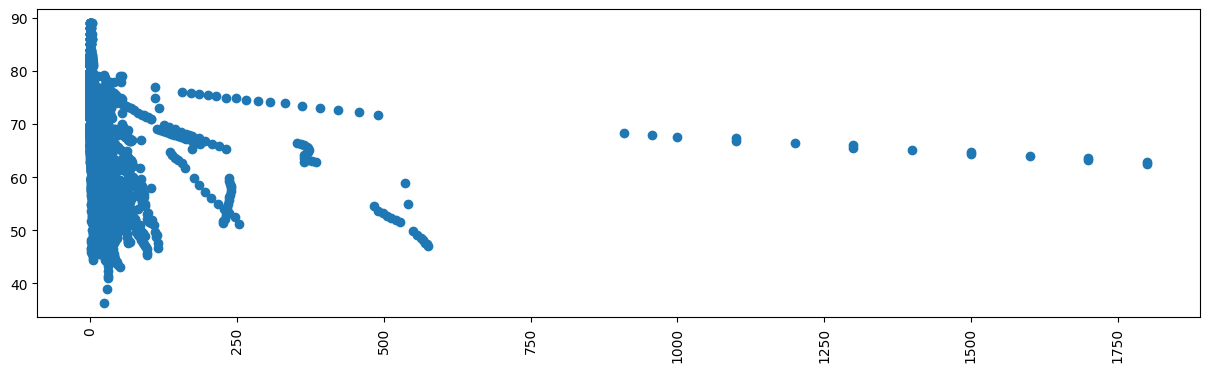

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['infant deaths'], df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:
The presented scatter plot indicates a discernible relationship between infant deaths and life expectancy. This visual analysis offers valuable insights, uncovering potential patterns or correlations within the dataset. The graphical representation enhances our understanding, providing a glimpse into the potential connections between variations in infant mortality and shifts in life expectancy.

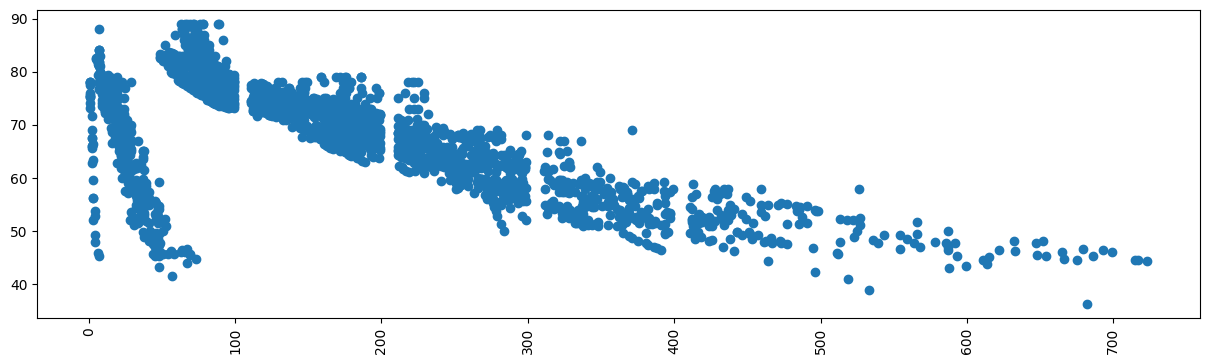

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Adult Mortality'], df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

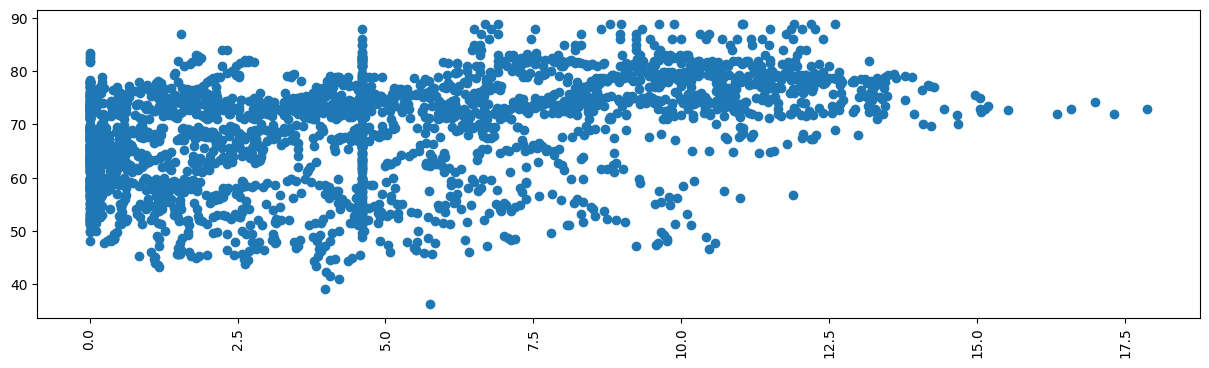

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Alcohol'],df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:
From the above plot we can conclude that the scatter plot effectively illustrates the relationship between adult mortality and life expectancy, offering valuable insights into potential patterns or correlations in the data.

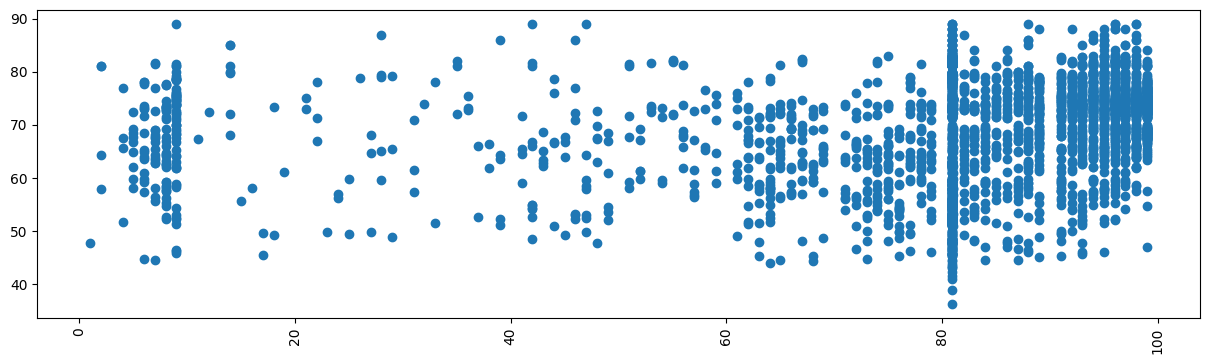

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Hepatitis B'],df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:

The scatter plot depicts the correlation between Hepatitis B prevalence and life expectancy, providing valuable insights into their relationship across various data points. By examining different graphical representations and analyzing the data, we can discern the correlations between these variables

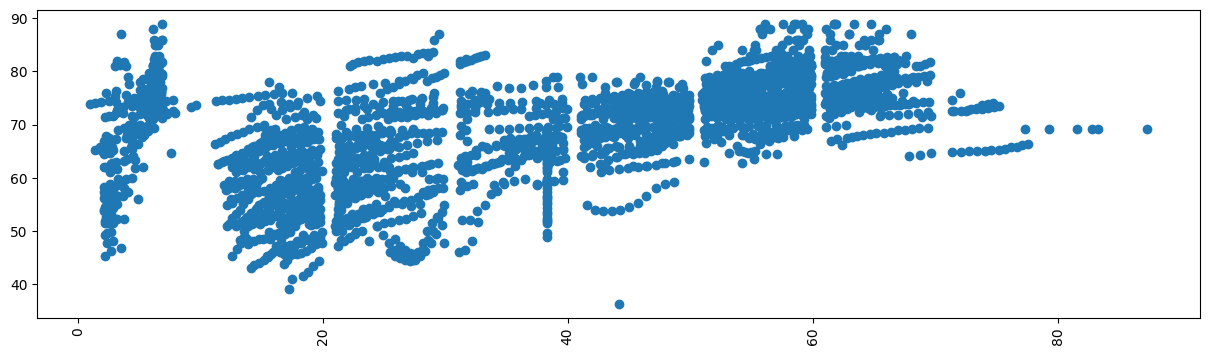

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['BMI'], df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:

The scatter plot above illustrates the correlation between BMI (Body Mass Index) and life expectancy. By delving into various graphical representations, we can extract insights from the data and ascertain the correlation between these variables.

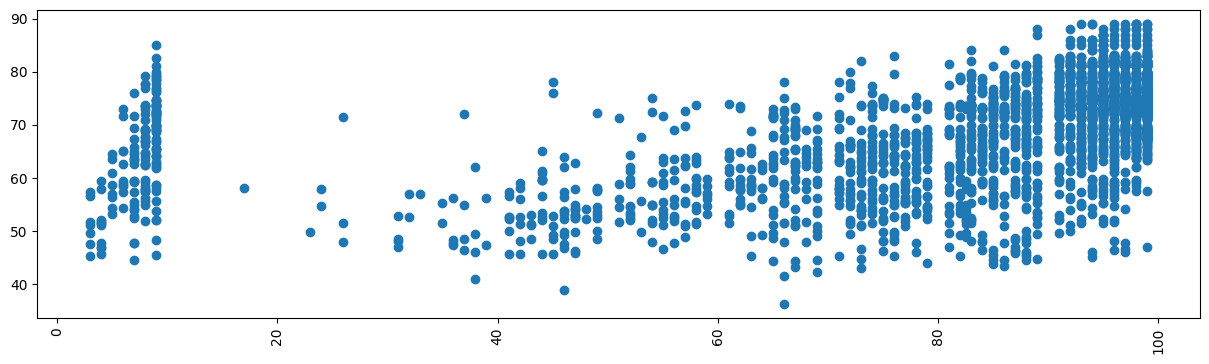

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Polio'], df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:

The scatter plot depicted above reveals the association between Polio prevalence and life expectancy. Through graphical representations and analysis, we aim to uncover valuable insights within the data and determine the correlation between these variables.

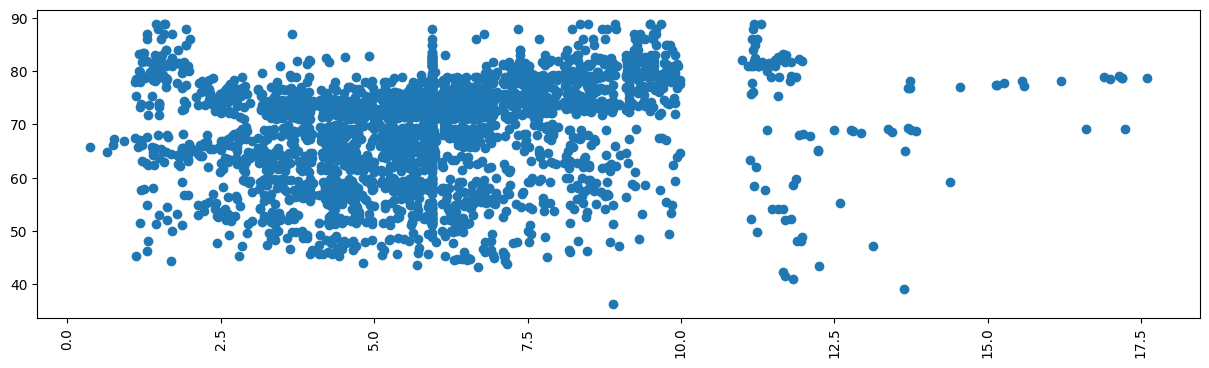

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Total expenditure'], df['Life expectancy'])
plt.xticks(rotation= 90)
plt.show()

Conclusion:
The scatter plot above illustrates the correlation between 'Total expenditure' and life expectancy. By exploring various graphical representations and conducting analysis, we aim to extract insights from the data and determine the correlation between these variables.

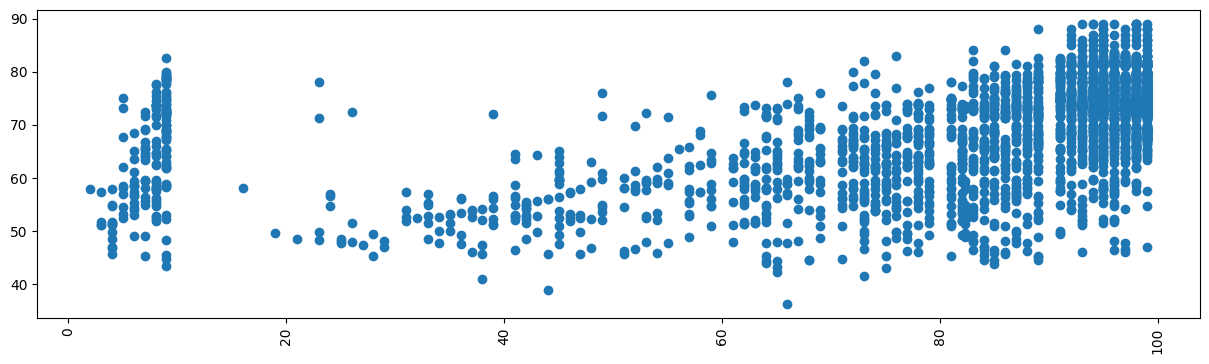

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Diphtheria'],df['Life expectancy'])
plt.xticks(rotation=90)
plt.show()

Conclusion:

The scatter plot visually represents the correlation between the variables 'Diphtheria' and 'Life Expectancy'. Through analysis of this plot, we aim to derive insights regarding their relationship. Additionally, we will utilize graphical representations to further explore this relationship and determine the correlation coefficient between the two variables.



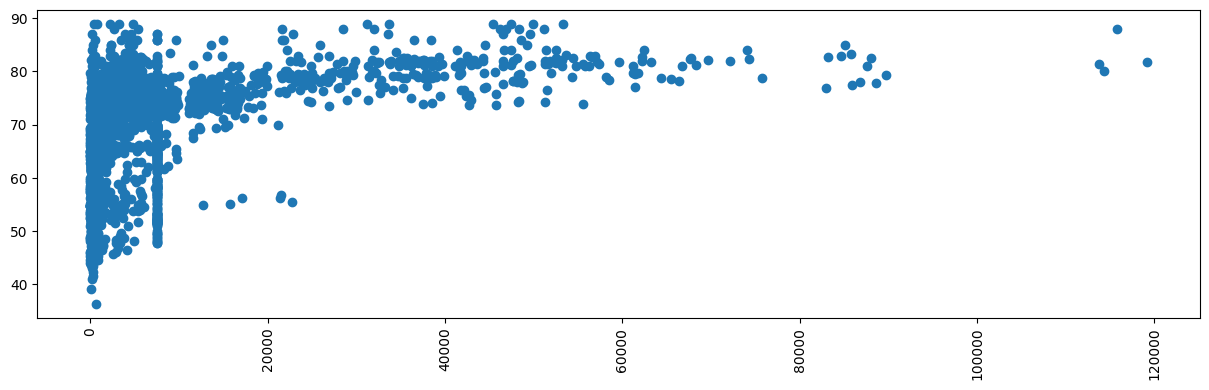

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['GDP'],df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:

The scatter plot visually depicts the correlation between the 'GDP' (Gross Domestic Product) and life expectancy, offering insights into their relationship. Additionally, by analyzing graphical representations and calculating correlation coefficients, we can further discern the nature and strength of the association between these variables.

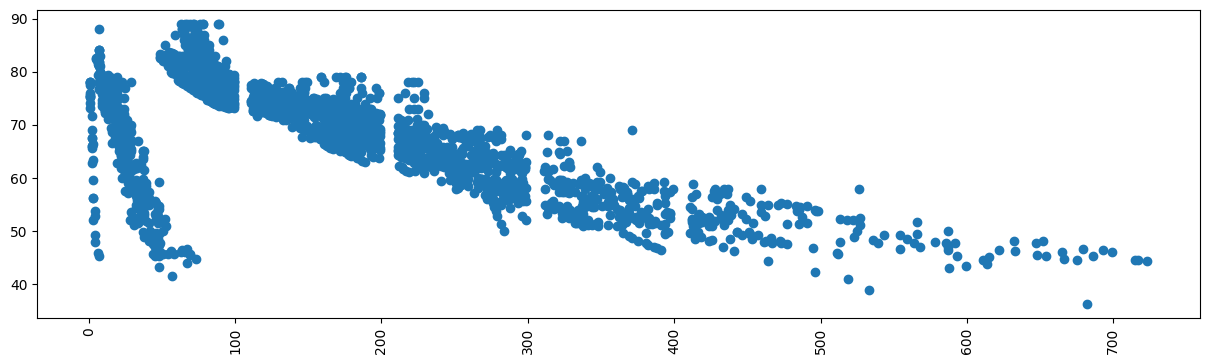

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Adult Mortality'], df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:
The scatter plot illustrates the correlation between the variables "Adult Mortality" and "Life Expectancy". Through visual analysis, we aim to extract insights regarding the relationship between these two columns and quantify their correlation. To achieve this, we will employ graphical representations and statistical measures to discern patterns and associations between the variables.

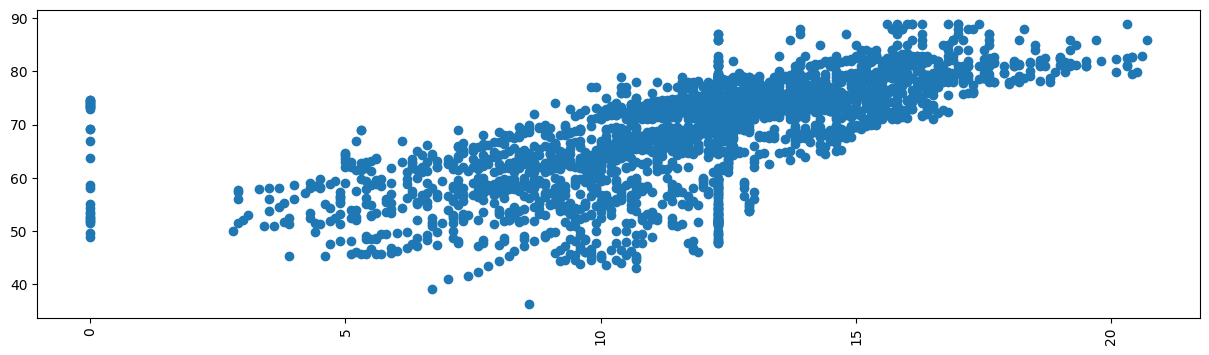

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['Schooling'], df['Life expectancy'])
plt.xticks(rotation =90)
plt.show()

Conclusion:
The scatter plot illustrates the correlation between the variables 'Schooling' and 'Life Expectancy.' Through visual analysis, we aim to extract meaningful insights regarding their relationship. By further exploring graph representations and calculating the correlation coefficient between these variables, we seek to uncover deeper insights into how schooling influences life expectancy.

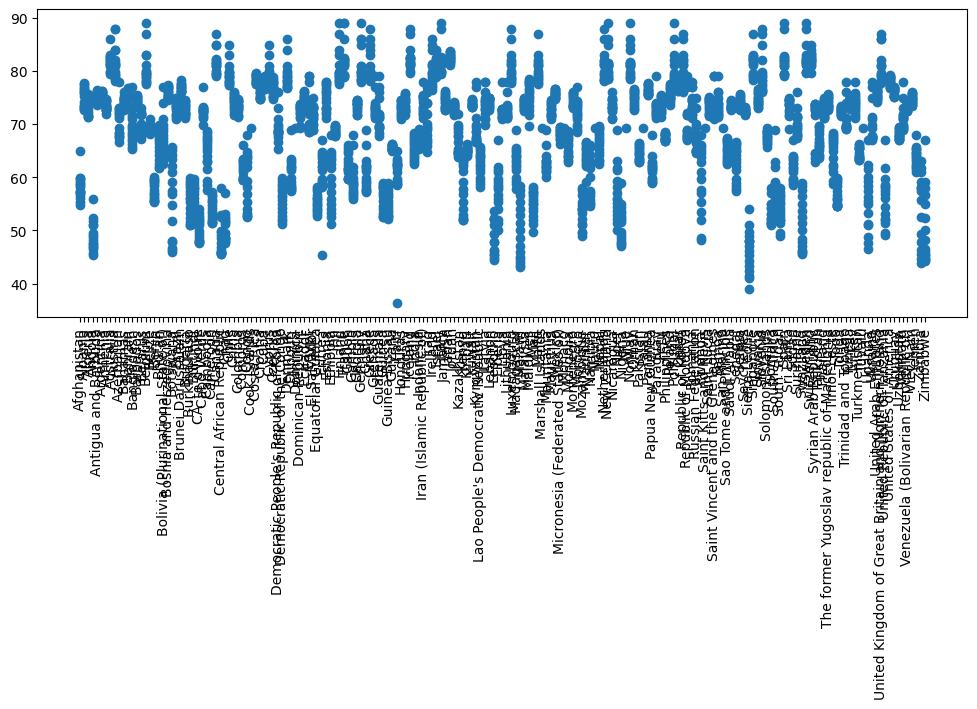

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(df['Country'], df['Life expectancy'])
plt.xticks(rotation=90)
plt.show()

Conclusion:
The scatter plot illustrates the correlation between the 'Country' and 'Life Expectancy' columns. Analyzing the data, we aim to extract insights and depict them graphically. Additionally, we seek to quantify the correlation between these variables.

Now we can groupby the column 'Status', 'GDP',with the column 'country'and reset the column index

In [ ]:
df.groupby(['Status','GDP'])['Country'].sum().reset_index(name='country status according to GDP')

,Status,GDP,country status according to GDP
0,Developed,12.277330,Romania
1,Developed,24.819000,Italy
2,Developed,46.217000,Iceland
3,Developed,92.277825,Romania
4,Developed,94.772600,Poland
...,...,...,...
2487,Developing,66346.522670,Qatar
2488,Developing,82967.372280,Qatar
2489,Developing,85948.746000,Qatar
2490,Developing,86852.711900,Qatar


Conclusion:
The DataFrame has been grouped by two columns: 'Status' and 'GDP'. Within each group, the corresponding 'Country' values have been summed up. The resulting DataFrame contains a new column named 'country status according to GDP', which represents the sum of countries within each combination of 'Status' and 'GDP' categories. This operation allows for a concise overview of country distribution according to their economic status (GDP) within each broader classification of 'Status'.

No we can groupby the colummns 'Life Expectancy','Schooling'and reset the column index

In [ ]:
df.groupby('Schooling')['Life expectancy'].sum().reset_index(name='life expectancy by schooling')

,Schooling,life expectancy by schooling
0,0.0,1773.349863
1,2.8,50.000000
2,2.9,222.500000
3,3.0,52.100000
4,3.1,52.900000
...,...,...
168,20.3,333.700000
169,20.4,245.000000
170,20.5,79.900000
171,20.6,83.000000


Conclusion:
The DataFrame has been grouped by the 'Schooling' column, which likely represents different levels of education or schooling attainment. Within each schooling group, the corresponding 'Life expectancy' values have been summed up. The resulting DataFrame contains a new column named 'life expectancy by schooling', representing the total life expectancy within each schooling category. This operation allows for understanding how life expectancy varies across different levels of schooling attainment.

Now apply label encoding and One Hot code





# **Label Encoder OneHot Code**

In [ ]:
df.replace({'Status':{'Developing':0,'Developed':1}},inplace=True)

Conclusion:
The code replaces the values in the 'Status' column. It changes 'Developing' to 0 and 'Developed' to 1. This transformation likely aims to convert categorical labels into numerical representations, possibly to facilitate mathematical operations or machine learning algorithms that require numerical input. The inplace=True parameter ensures that the changes are made directly to the DataFrame, rather than creating a new DataFrame with the modifications.

In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany

Conclusion:
 This code allows you to quickly extract and view all unique country names present in the 'Country' column of your DataFrame.







In [ ]:
label_encode=LabelEncoder()
df['Country']=label_encode.fit_transform(df['Country'])

Conclusion:
 This code converts the categorical values in the 'Country' column of the DataFrame df into numerical labels using the LabelEncoder from scikit-learn, enabling further analysis or modeling with machine learning algorithms that require numerical inputs.

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Conclusion:
This code comment makes it explicit that df.head() is being used to display the initial rows of the DataFrame. You can execute this code cell in Google Colab to see the first 5 rows of your DataFrame.

In [ ]:
# correlation between the feature
df.corr()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,0.031635,-0.016745,0.039760,-0.030528,-0.060052,-0.032983,-0.018918,-0.024593,...,0.017750,0.053226,-0.006119,0.090206,-0.015201,-0.014347,0.007988,0.022513,-0.023600,-0.023323
Year,0.001342,1.000000,-0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,...,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203517
Status,0.031635,-0.001864,1.000000,0.481962,-0.315171,-0.112252,0.579371,0.454261,0.095642,-0.076955,...,0.220098,0.289985,0.216763,-0.148590,0.445911,-0.041091,-0.367934,-0.366297,0.457302,0.492984
Life expectancy,-0.016745,0.169623,0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,...,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.713738
Adult Mortality,0.039760,-0.078861,-0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,...,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.433753
infant deaths,-0.030528,-0.037415,-0.112252,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,...,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.190951
Alcohol,-0.060052,-0.048168,0.579371,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,...,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.499330
percentage expenditure,-0.032983,0.031400,0.454261,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,...,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.386076
Hepatitis B,-0.018918,0.089398,0.095642,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,...,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171858
Measles,-0.024593,-0.082493,-0.076955,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,...,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.120799


Conclusion:
df.corr() is a convenient method to quickly analyze the linear relationship between numerical variables in a DataFrame, helping to identify potential patterns or dependencies in the data.







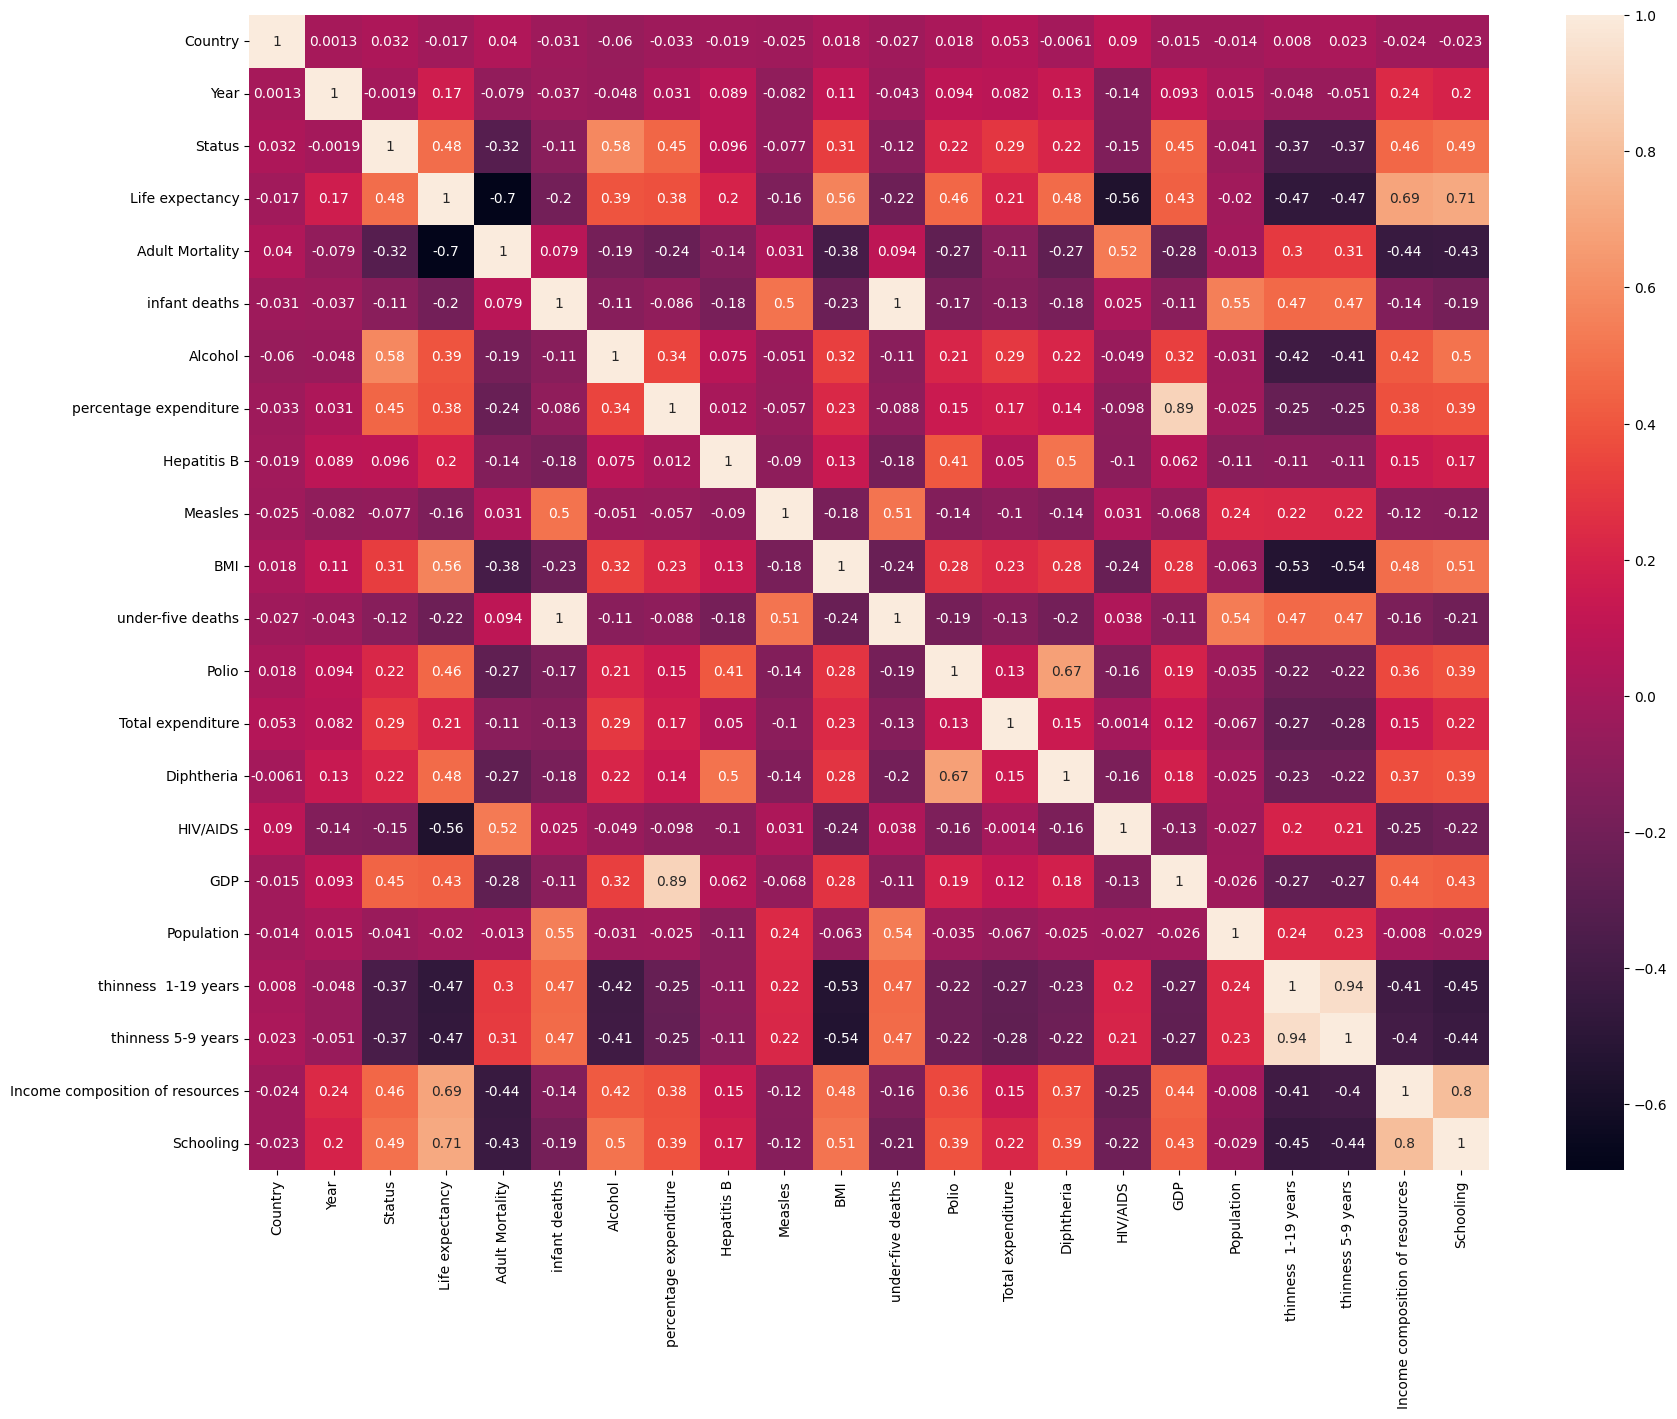

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

Conclusion:
In conclusion, this code produces a visually appealing heatmap that provides insight into the linear relationships between the numerical variables in the DataFrame df. The annotations within the heatmap show the correlation coefficient values, allowing for easy interpretation of the strength and direction of correlations between different pairs of variables.

Assume dependent and independent variable

In [ ]:
dependent_variable=df['Life expectancy']
independent_variable=df.drop(columns='Life expectancy')

Conclusion:
  From the  above we can observed that the code is preparing data for some kind of predictive modeling or statistical analysis, where the goal is to predict life expectancy using other variables in the dataset

Now check the first columns and rows of the Life expectancy

In [ ]:
dependent_variable.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

  Conclusion:

 "The df.head() function displays the first 5 rows of the DataFrame df, focusing on the dependent variable.

In [ ]:
independent_variable.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Conclusion:
"The df.head() function displays the first 5 rows of the DataFrame df, focusing on the dependent variable.

In [ ]:
X=independent_variable
y=dependent_variable

  Conclusion:
  We can denote the independent variable as 'X' and the dependent variable as 'Y' for subsequent analysis.

# **Split the dataset**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X_train[::10]

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
683,42,2005,1,65.0,0,11.410000,1562.520827,88.000000,1,55.3,...,98.0,6.37000,98.0,0.1,25324.486660,1.276580e+05,0.9,1.0,0.826,13.5
1581,100,2004,0,615.0,40,1.110000,58.135833,89.000000,1116,15.5,...,94.0,7.82000,89.0,23.4,274.225629,1.267638e+06,7.5,7.4,0.366,10.0
188,11,2003,0,85.0,0,2.160000,1214.558167,98.000000,12,55.2,...,97.0,3.74000,97.0,0.1,14221.992590,1.275338e+07,6.1,5.9,0.798,13.7
944,60,2001,0,13.0,3,13.890000,3451.185079,28.000000,0,55.2,...,98.0,9.89000,97.0,0.1,22527.317750,6.135743e+07,0.7,0.6,0.849,15.6
1094,70,2011,0,289.0,4,3.570000,40.453674,86.000000,0,23.7,...,85.0,5.46000,86.0,5.7,692.699890,1.596154e+06,7.8,7.7,0.410,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,143,2007,0,151.0,0,12.680000,0.000000,99.000000,0,41.3,...,99.0,6.81000,99.0,0.1,7483.158469,1.275338e+07,4.3,4.4,0.707,12.8
544,33,2015,0,82.0,2,4.602861,0.000000,97.000000,9,63.8,...,96.0,5.93819,96.0,0.1,13653.226400,1.776268e+07,0.8,0.8,0.845,16.3
2496,164,2008,0,477.0,3,4.870000,413.006303,9.000000,1,28.9,...,89.0,8.19000,88.0,40.2,2842.438422,1.158897e+06,6.1,6.3,0.514,10.6
537,32,2006,0,414.0,45,0.410000,62.672260,80.940461,1594,15.7,...,49.0,3.32000,4.0,5.1,712.184769,1.421597e+06,1.3,1.2,0.303,5.5


Conclusion:
Now, we will split the dataset into independent and dependent variables, denoted as 'X' and 'Y' respectively, to proceed with training and testing the model.

Now we can transform the data with the help of min max scalar

# **Min-Max Scaler**

In [ ]:
# transform data into min max scalar
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
X_train[::10]

array([[0.21875   , 0.33333333, 1.        , ..., 0.03157895, 0.87130802,
        0.65217391],
       [0.52083333, 0.26666667, 0.        , ..., 0.25614035, 0.38607595,
        0.48309179],
       [0.05729167, 0.2       , 0.        , ..., 0.20350877, 0.84177215,
        0.66183575],
       ...,
       [0.85416667, 0.53333333, 0.        , ..., 0.21754386, 0.54219409,
        0.51207729],
       [0.16666667, 0.4       , 0.        , ..., 0.03859649, 0.31962025,
        0.26570048],
       [0.61458333, 0.        , 0.        , ..., 0.67017544, 0.46308017,
        0.42995169]])

Conclusion:
We can enhance the predictive performance by normalizing the data using the Min-Max Scaler technique.

Now we are processing our data for implementing the model

In [ ]:
# implementing Linear Regression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Conclusion:
Now, let's proceed with implementing the algorithm and evaluating the model's performance.

In [ ]:
regressor.intercept_

54.808975159913864

Conclusion:
The conclusion of this code is that it retrieves the intercept term of the linear regression model, providing insight into the baseline value of the dependent variable.








In [ ]:
regressor.coef_

array([   0.83656157,   -0.19712228,    1.49224866,  -14.29232113,
        184.03682995,    1.16824042,    1.90475961,   -1.51169891,
         -4.60985008,    4.14683233, -192.26179708,    2.90072045,
          1.8917406 ,    3.85299365,  -23.23924146,    3.95674557,
          1.63262853,   -2.63927794,    0.82776933,    5.84006822,
         12.09906242])

Conclusion:
 It provides insight into the strength and direction of the relationship between each independent variable and the dependent variable in the linear regression model.

In [ ]:
# prediction of the data

y_pred_train = regressor.predict(X_train)

Conclusion:
y_pred_train will hold the predicted values of the dependent variable for the training dataset based on the fitted regression model. This allows for evaluating the model's performance on the training data.

In [ ]:
y_train

683     78.7
478     58.5
2359    76.2
971     58.2
880     78.0
        ... 
763     58.6
835     57.9
1653    62.7
2607    66.6
2732    71.0
Name: Life expectancy, Length: 2350, dtype: float64

Conclusion:
y_train contains the real values of the dependent variable from the training dataset, which are used for training the model and evaluating its performance during the training phase.

In [ ]:
y_pred_train


array([78.4947118 , 56.60998125, 77.27455813, ..., 63.36465437,
       66.91899317, 70.81074454])

Conclusion:
y_pred_train refers to the predicted values of the target variable (y) on the training data.


In [ ]:
y_pred_test = regressor.predict(X_test)

Conclusion:
The variable y_pred_test now contains the predicted values of the target variable based on the features provided in the test dataset (X_test). These predictions are generated by applying the trained regression model (regressor) to the unseen data.

In [ ]:
y_test

867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
        ... 
1290    81.3
2724    53.2
392     72.6
27      73.0
674     83.0
Name: Life expectancy, Length: 588, dtype: float64

Conclusion:
The variable y_test contains the actual values of the target variable corresponding to the features provided in the test dataset. These actual values serve as ground truth against which the predictions made by the regression model (or any predictive model) can be compared and evaluated. By comparing the predicted values (y_pred_test) with y_test, one can assess the performance of the model on unseen data, helping to determine its accuracy, precision, and generalization capabilities. This comparison aids in understanding how well the model performs in real-world scenarios and whether it effectively captures the underlying patterns present in the data

In [ ]:
y_pred_test

array([76.62537057, 65.89259349, 53.22695226, 67.05139621, 59.938239  ,
       61.61113692, 71.33745031, 78.90552998, 70.89451256, 46.86873007,
       67.85402772, 80.05348051, 72.247042  , 73.30275914, 60.39397565,
       71.86584661, 60.10502336, 66.44040188, 70.292059  , 81.28329197,
       69.14831177, 74.35558686, 72.98429451, 81.16893043, 67.86765196,
       61.10778741, 82.31031078, 71.96766166, 70.18875996, 72.88416277,
       75.69933141, 53.44689331, 75.78540907, 76.65553845, 75.37700493,
       71.63469364, 74.06122044, 83.49292654, 63.26842464, 70.76696145,
       64.97278515, 73.58852704, 75.92839217, 73.6358544 , 71.5033005 ,
       78.40828055, 58.86893781, 72.91634711, 54.50352329, 72.55666651,
       74.02254991, 62.35183278, 78.21122924, 69.49929765, 68.04101285,
       71.22370103, 81.23420502, 71.10140452, 59.65285724, 71.07420335,
       69.85888866, 71.35626787, 72.6190276 , 67.92032472, 57.86657583,
       73.70408303, 71.05464268, 73.73346972, 64.67756694, 75.91

Conclusion:
The variable y_pred_test contains the predicted values of the target variable based on the features provided in the test dataset.

Now we can implement r2 Score

# **R2 Score**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)*100

81.89815136818868

Conclusion:
The R-squared score, calculated using the r2_score function from Scikit-learn, quantifies the proportion of the variance in the target variable (y_train) that is explained by the independent variables or features in the model.

In [ ]:
r2_score(y_test,y_pred_test)*100

82.12800798102235

Conclusion:
The R-squared score, calculated using the r2_score function from Scikit-learn, quantifies the proportion of the variance in the target variable (y_test) that is explained by the predictions made by the model (y_pred_test).

Now we can implement the ridge

# **Ridge**

In [ ]:
# implementing ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

Conclusion:
 The code performs hyperparameter tuning for Ridge regression, aiming to find the best combination of hyperparameters that optimizes model performance in terms of minimizing mean squared error on the training data.

In [ ]:
ridge_regressor.best_params_

{'alpha': 0.001}

Conclusion:
By accessing ridge_regressor.best_params_, one can determine the optimal values for the hyperparameters, particularly the alpha parameter in Ridge regression, which governs the strength of regularization. These best parameters can then be used to instantiate a new Ridge regression model with the optimal configuration for making predictions on new data or for further analysis.

In [ ]:
ridge_regressor.best_score_

-16.6266485772919

Conclusion:
The value obtained from ridge_regressor.best_score_ provides an estimate of the performance of the best estimator on unseen data.

Now we can implement the Lasso

# **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+04, tolerance: 1.727e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+04, tolerance: 1.649e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.522e+04, tolerance: 1.692e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

Conclusion:
 The code performs hyperparameter tuning for Lasso regression, aiming to find the best combination of hyperparameters that optimizes model performance in terms of minimizing mean squared error on the training data.

In [ ]:
lasso_regressor.best_params_

{'alpha': 1e-08}

Conclusion:
The best_params_ attribute of the lasso_regressor object returns a dictionary containing the best set of hyperparameters found through the grid search. These hyperparameters are selected based on their performance in minimizing the specified scoring metric (in this case, negative mean squared error) during cross-validation.

In [ ]:
lasso_regressor.best_score_

-16.62856096949986

Conclusion:
The best_score_ attribute of the lasso_regressor object returns the mean cross-validated score achieved by the best estimator during the hyperparameter tuning process. In this case, the score is based on the specified scoring metric (negative mean squared error) and is calculated using cross-validation.

In [ ]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score = r2_score(y_pred,y_test)
print(r2_score*100)

76.08312993564113


Conclusion:
This metric is commonly used to evaluate the predictive performance of regression models on unseen data, providing insights into how well the model generalizes to new observations and captures the underlying relationships between the features and the target variable.

Adjusted R-Square Error

In [ ]:
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1-(1-r2_score)*((n-1)/(n-p-1))

Conclusion:
This adjusted R-squared score can provide a more reliable measure of the model's performance, especially when comparing models with different numbers of predictors or assessing the impact of adding more predictors to the model.

In [ ]:
print('Adjusted R-squared score',adj_r2*100)

Adjusted R-squared score 75.9108891018443


# **Calculated 'Mean_Squared_Error' and 'Root_Mean_Squared_Error**

In [ ]:
from sklearn.metrics import mean_squared_error
import math

Mean squared error

In [ ]:
mean_squared_error(y_train,y_pred_train)

16.313040811348426

Conclusion:
MSE is commonly used as a loss function during model training and evaluation, helping to optimize model parameters and assess predictive performance. It provides valuable insights into the magnitude of errors made by the model, aiding in model selection and fine-tuning.

Root Mean Squared Error

In [ ]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

4.038940555560137

Conclusion:
